# Import

In [5]:
import torch

In [7]:
import torch.nn as nn

In [8]:
import plotly.express as px

In [9]:
import torch.nn.functional as F

In [10]:
from torch.utils.data import DataLoader, random_split, TensorDataset

In [2]:
import pandas as pd

# Code

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/car%20data.csv')

In [4]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [17]:
df.groupby("Year")["Selling_Price"].max()

Year
2003     2.25
2004     1.50
2005     3.51
2006     2.50
2007     0.20
2008     4.00
2009     3.80
2010    35.00
2011     4.50
2012    14.90
2013    16.00
2014    19.99
2015    23.50
2016    20.75
2017    33.00
2018     9.25
Name: Selling_Price, dtype: float64

In [19]:
df.groupby("Year")["Present_Price"].max()

Year
2003     7.98
2004    12.35
2005    13.70
2006    23.73
2007     0.75
2008    22.78
2009    18.61
2010    92.60
2011    13.74
2012    30.61
2013    30.61
2014    35.96
2015    35.96
2016    25.39
2017    36.23
2018     9.83
Name: Present_Price, dtype: float64

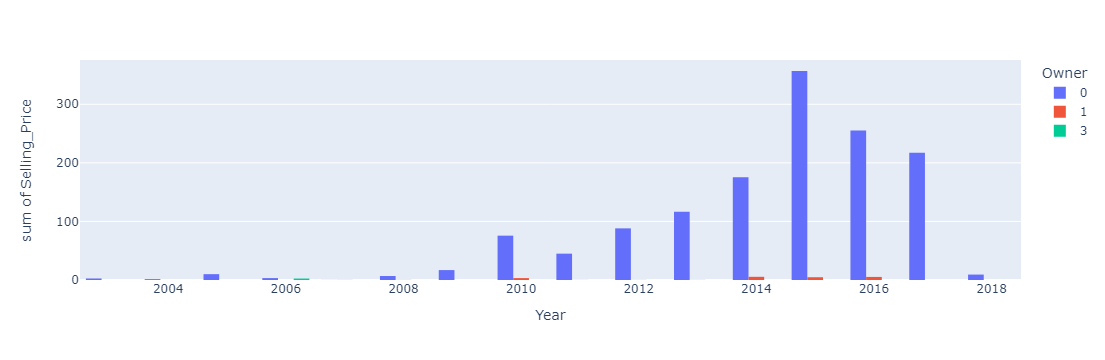

In [22]:
px.histogram(df,"Year","Selling_Price",color="Owner",barmode='group')

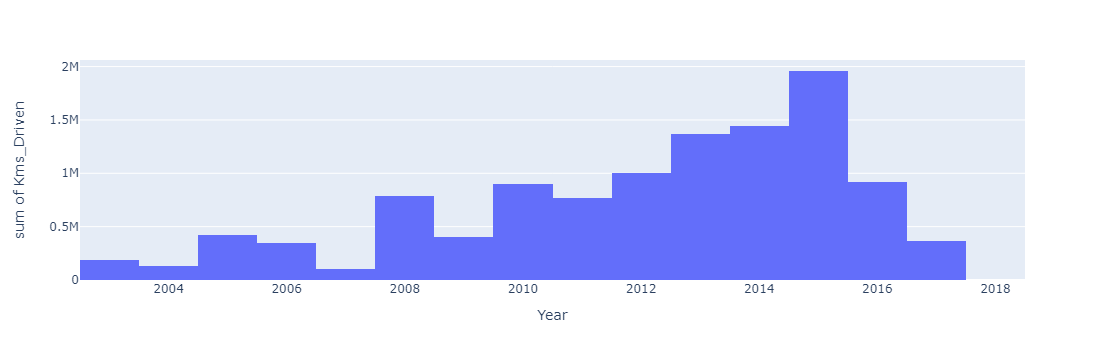

In [24]:
px.histogram(df,"Year","Kms_Driven")


In [28]:
def custom_data(dataframe,rand_str):
    dataframe = dataframe.copy(deep=True)

    dataframe =dataframe.sample(int(0.95*len(dataframe)),random_state=int(ord(rand_str[0])))

    dataframe.Year = dataframe.Year * ord(rand_str[1])/100

    dataframe.Selling_Price = dataframe.Selling_Price * ord(rand_str[2])/100

    if ord(rand_str[3])%2 == 1:
        dataframe = dataframe.drop(['Car_Name'],axis=1)
    return dataframe

In [29]:
df2 = custom_data(df,"Mahat")

In [30]:
df2

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
8,1955.52,9.100,8.89,20273,Diesel,Dealer,Manual,0
37,1942.91,0.364,2.28,127000,Petrol,Individual,Manual,0
141,1955.52,0.624,0.80,20000,Petrol,Individual,Manual,0
65,1953.58,4.940,6.95,45000,Diesel,Dealer,Manual,0
252,1954.55,5.616,6.82,31427,Petrol,Dealer,Automatic,0
...,...,...,...,...,...,...,...,...
229,1951.64,3.224,6.79,52132,Diesel,Dealer,Manual,0
126,1956.49,0.936,0.95,1300,Petrol,Individual,Manual,0
267,1955.52,8.684,9.40,19434,Diesel,Dealer,Manual,0
257,1954.55,8.840,13.60,40324,Petrol,Dealer,Manual,0


In [31]:
input_cols = ["Year","Present_Price","Kms_Driven","Owner"]
categorical_cols = ["Fuel_Type","Seller_Type","Transmission"]
output_cols = ["Selling_Price"]

In [39]:
def dataframe_to_array(dataframe):
    dataframe = dataframe.copy(deep=True)

    for col in categorical_cols:
        dataframe[col] = dataframe[col].astype("category").cat.codes

    input_arrays = dataframe[input_cols].to_numpy()
    target_arrays = dataframe[output_cols].to_numpy()

    return input_arrays, target_arrays

In [40]:
input_arrays, target_arrays = dataframe_to_array(df2)

In [42]:
inputs = torch.Tensor(input_arrays)
outputs = torch.Tensor(target_arrays)
dataset = TensorDataset(inputs,outputs)


In [47]:
train_ds, val_ds = random_split(dataset,[228,57])

In [ ]:
input_size = len(input_cols)
output_size = len(output_cols)

class Carsmodel(nn.Module):
    def __init__(self):
        super.__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self,ox):
        out = self.linear(ox)
        return out

    def